In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../src')
import numpy as np
import matplotlib.pyplot as plt
from simulation.simulation import *

In [ ]:
parameters = {
    "n_of_replicas" : 5,
    "n_humans" : 100,
    "n_bots" : 0,
    "nei" : 6,
    "p" : 0.05,
    "N_steps" : 10000,
    "waiting_time" : 5000,
    "mu" : 0.075,
    "epsilon": 0.3,
    "bot_threshold" : -0.5,
    "beta0" : 0.0125*4,
    "recovery_rate" : 0.025*4,
    "I0" : 1,
    "communication_error" : 0.0,
    "post_history": 10,
    "feed_size": 5
}
RES0 = simulations(parameters)
save_results(RES0, "only100_0bots.pkl")
# save the results

Running replica 1/5
Step 0 of 10000
Step 500 of 10000
Step 1000 of 10000
Step 1500 of 10000
Step 2000 of 10000
Step 2500 of 10000
Step 3000 of 10000
Step 3500 of 10000
Step 4000 of 10000
Step 4500 of 10000
Step 5000 of 10000
Step 5500 of 10000
Step 6000 of 10000
Step 6500 of 10000
Step 7000 of 10000
Step 7500 of 10000
Step 8000 of 10000
Step 8500 of 10000
Step 9000 of 10000
Step 9500 of 10000
Running replica 2/5
Step 0 of 10000
Step 500 of 10000
Step 1000 of 10000
Step 1500 of 10000
Step 2000 of 10000
Step 2500 of 10000
Step 3000 of 10000
Step 3500 of 10000
Step 4000 of 10000
Step 4500 of 10000
Step 5000 of 10000
Step 5500 of 10000
Step 6000 of 10000
Step 6500 of 10000
Step 7000 of 10000
Step 7500 of 10000
Step 8000 of 10000
Step 8500 of 10000
Step 9000 of 10000
Step 9500 of 10000
Running replica 3/5
Step 0 of 10000
Step 500 of 10000
Step 1000 of 10000
Step 1500 of 10000
Step 2000 of 10000
Step 2500 of 10000
Step 3000 of 10000
Step 3500 of 10000
Step 4000 of 10000
Step 4500 of 10000
St

'results\\only100_0bots.pkl'

In [10]:
def plot_agent_opinions(consolidated, replica_idx=0, n_agents_to_plot=10):
    """
    Plot opinion trajectories for individual agents over time
    
    Args:
        consolidated: Consolidated results from simulations()
        replica_idx: Which trajectory replica to plot (default: first one)
        n_agents_to_plot: How many agents to show (default: 10)
    """
    # Check if trajectory data exists
    if consolidated['opinions'] is None:
        print("No trajectory data available. Only first 5 replicas have individual opinion trajectories.")
        return
    
    # Check if requested replica has trajectory data
    if replica_idx >= consolidated['opinions'].shape[0]:
        print(f"Replica {replica_idx} doesn't have trajectory data.")
        print(f"Available trajectory replicas: 0 to {consolidated['opinions'].shape[0]-1}")
        return
    
    # Get data from specified replica
    save_steps = consolidated['save_steps']  # Time points when opinions were saved
    opinions = consolidated['opinions'][replica_idx]  # Shape: (n_time_points, n_humans)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot trajectories for first n_agents_to_plot agents
    for agent_id in range(min(n_agents_to_plot, opinions.shape[1])):
        agent_opinions = opinions[:, agent_id]  # Opinion trajectory for this agent
        plt.plot(save_steps, agent_opinions, alpha=0.7, linewidth=1.5, 
                label=f'Agent {agent_id}' if n_agents_to_plot <= 10 else None)
    
    plt.xlabel('Time Step')
    plt.ylabel('Opinion')
    plt.title(f'Individual Agent Opinion Trajectories (Trajectory Replica {replica_idx})')
    plt.grid(True, alpha=0.3)
    
    # Add legend only if not too many agents
    if n_agents_to_plot <= 10:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

def plot_opinion_distribution_evolution(consolidated, replica_idx=None):
    """
    Plot how opinion distribution changes over time using binned data
    
    Args:
        consolidated: Consolidated results from simulations()
        replica_idx: Which replica to plot (None for average across all replicas)
    """
    # Get opinion bins data
    if replica_idx is None:
        # Average across all replicas
        opinion_bins = np.mean(consolidated['opinion_bins'], axis=0)  # Shape: (n_steps, n_bins)
        title = "Opinion Distribution Evolution (Average across all replicas)"
    else:
        # Specific replica
        opinion_bins = consolidated['opinion_bins'][replica_idx]  # Shape: (n_steps, n_bins)
        title = f"Opinion Distribution Evolution (Replica {replica_idx})"
    
    # Create time points
    time_steps = np.arange(opinion_bins.shape[0])
    
    # Create the plot
    plt.figure(figsize=(14, 8))
    
    # Create a heatmap
    im = plt.imshow(opinion_bins.T, aspect='auto', origin='lower', 
                    extent=[0, len(time_steps)-1, 0, len(consolidated['bin_labels'])-1],
                    cmap='viridis', interpolation='nearest')
    
    plt.colorbar(im, label='Fraction of Agents')
    plt.xlabel('Time Step')
    plt.ylabel('Opinion Bin')
    plt.title(title)
    
    # Set y-axis labels to show bin ranges
    bin_labels = consolidated['bin_labels']
    tick_positions = np.arange(len(bin_labels))
    plt.yticks(tick_positions, [f'{i}: {label}' for i, label in enumerate(bin_labels)], fontsize=8)
    
    plt.tight_layout()
    plt.show()

def plot_aggregate_statistics(consolidated):
    """
    Plot aggregate statistics across all replicas
    
    Args:
        consolidated: Consolidated results from simulations()
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Time steps
    time_steps = np.arange(consolidated['mean_opinion'].shape[1])
    
    # Plot 1: Mean opinion over time
    ax1 = axes[0, 0]
    mean_trajectory = np.mean(consolidated['mean_opinion'], axis=0)
    std_trajectory = np.std(consolidated['mean_opinion'], axis=0)
    
    ax1.plot(time_steps, mean_trajectory, 'b-', linewidth=2, label='Mean')
    ax1.fill_between(time_steps, 
                     mean_trajectory - std_trajectory,
                     mean_trajectory + std_trajectory, 
                     alpha=0.3, color='blue', label='±1 std')
    ax1.set_xlabel('Time Step')
    ax1.set_ylabel('Mean Opinion')
    ax1.set_title('Mean Opinion Evolution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Opinion variance over time
    ax2 = axes[0, 1]
    var_mean = np.mean(consolidated['opinion_var'], axis=0)
    var_std = np.std(consolidated['opinion_var'], axis=0)
    
    ax2.plot(time_steps, var_mean, 'r-', linewidth=2, label='Mean')
    ax2.fill_between(time_steps, 
                     var_mean - var_std,
                     var_mean + var_std, 
                     alpha=0.3, color='red', label='±1 std')
    ax2.set_xlabel('Time Step')
    ax2.set_ylabel('Opinion Variance')
    ax2.set_title('Opinion Variance Evolution')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Extreme opinions over time
    ax3 = axes[1, 0]
    # Very negative opinions (first bin: < -0.9)
    extreme_neg = np.mean(consolidated['opinion_bins'][:, :, 0], axis=0)
    # Very positive opinions (last bin: > 0.9)
    extreme_pos = np.mean(consolidated['opinion_bins'][:, :, -1], axis=0)
    
    ax3.plot(time_steps, extreme_neg, 'r-', linewidth=2, label='Very negative (<-0.9)')
    ax3.plot(time_steps, extreme_pos, 'b-', linewidth=2, label='Very positive (>0.9)')
    ax3.set_xlabel('Time Step')
    ax3.set_ylabel('Fraction of Agents')
    ax3.set_title('Extreme Opinion Evolution')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Disease dynamics
    ax4 = axes[1, 1]
    I_mean = np.mean(consolidated['I_count'], axis=0)
    R_mean = np.mean(consolidated['R_count'], axis=0)
    
    ax4.plot(time_steps, I_mean, 'orange', linewidth=2, label='Infected')
    ax4.plot(time_steps, R_mean, 'green', linewidth=2, label='Recovered')
    ax4.set_xlabel('Time Step')
    ax4.set_ylabel('Number of Agents')
    ax4.set_title('Disease Dynamics')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

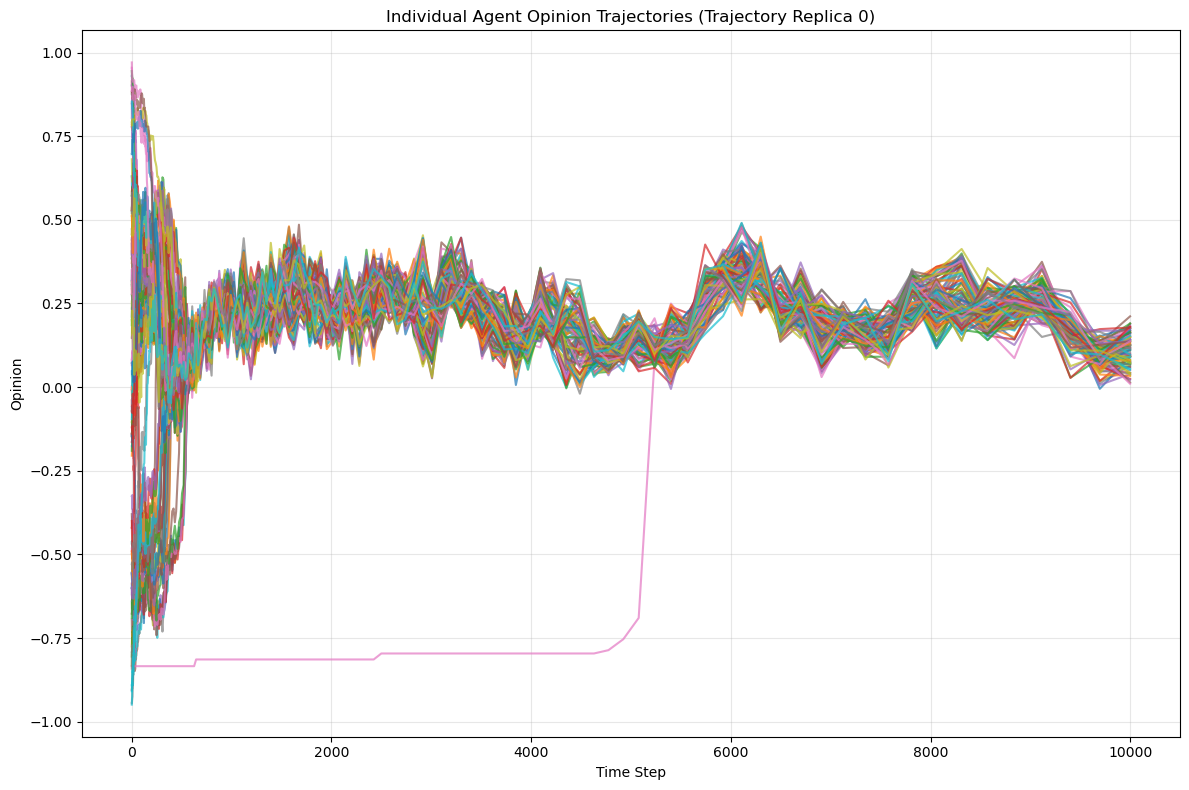

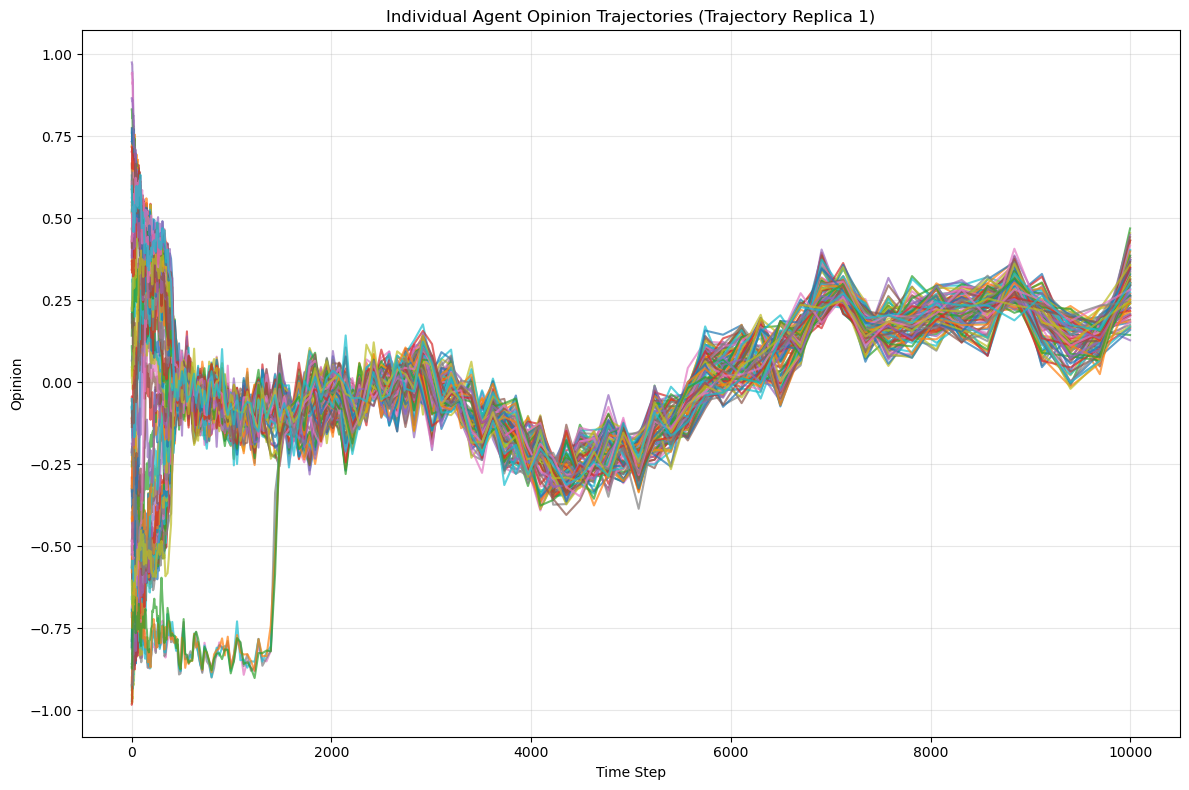

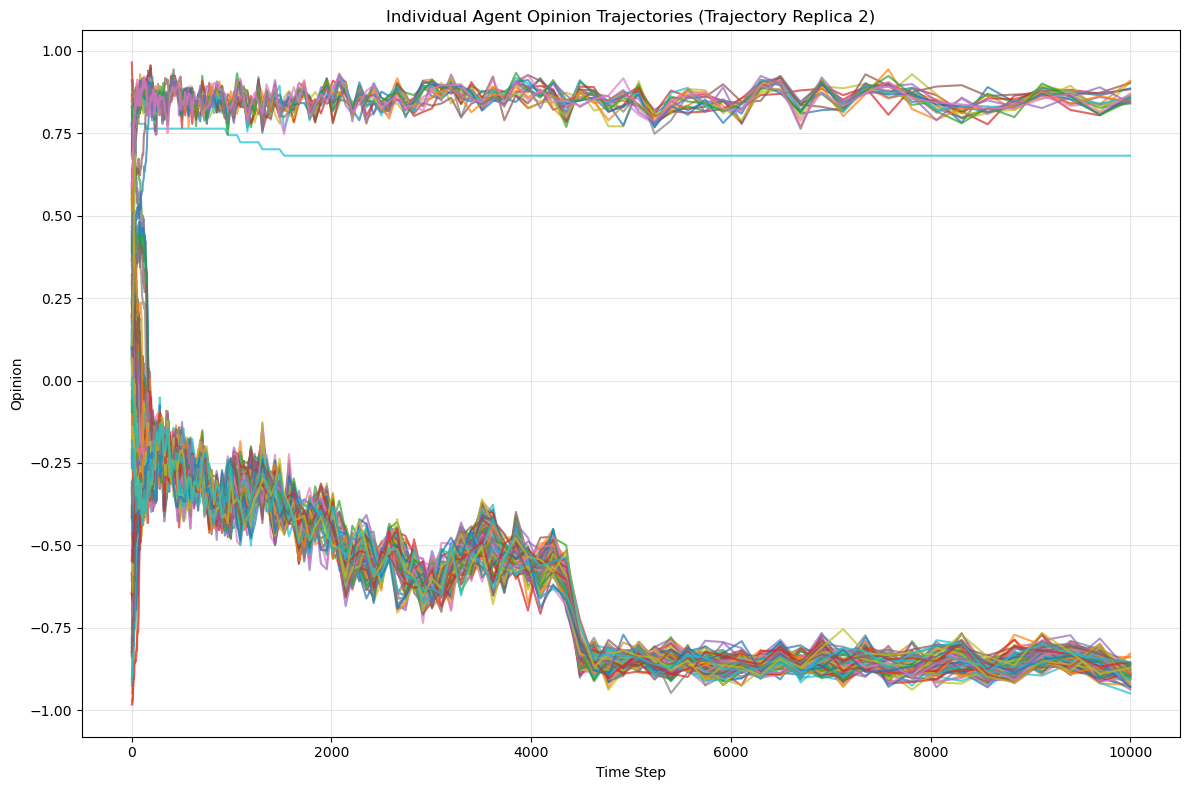

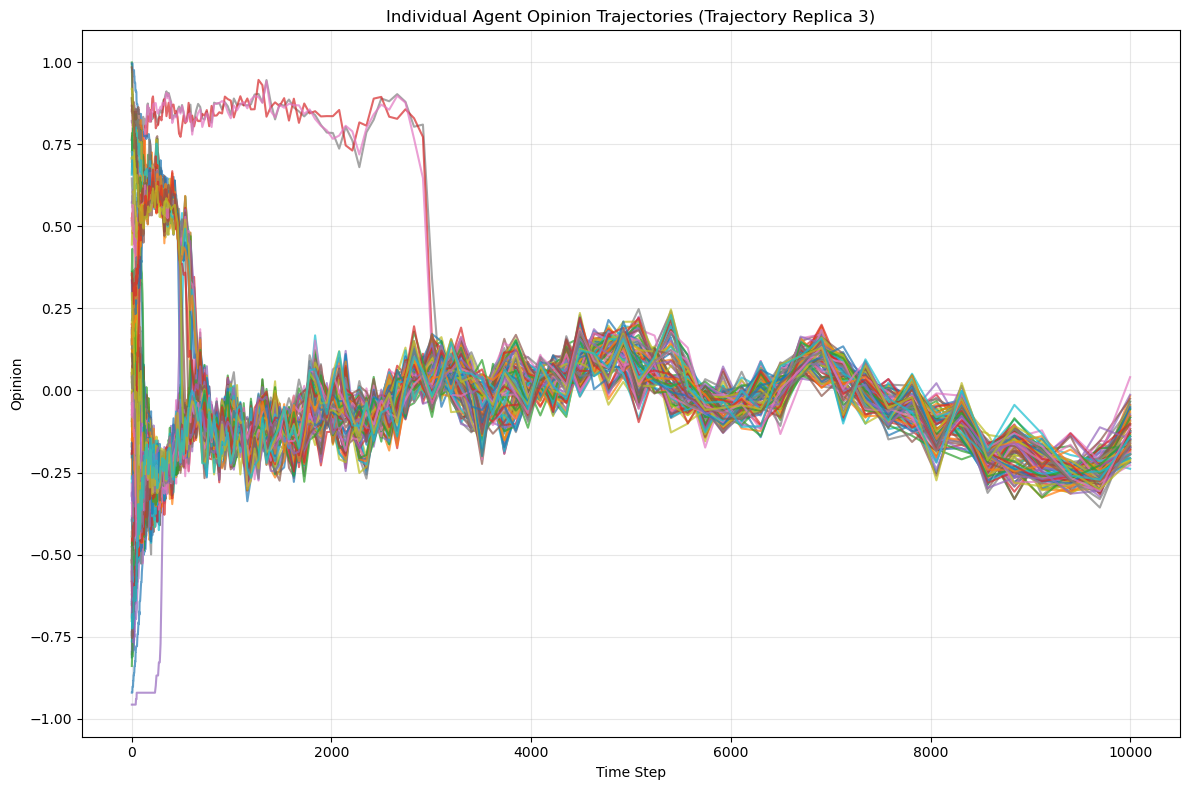

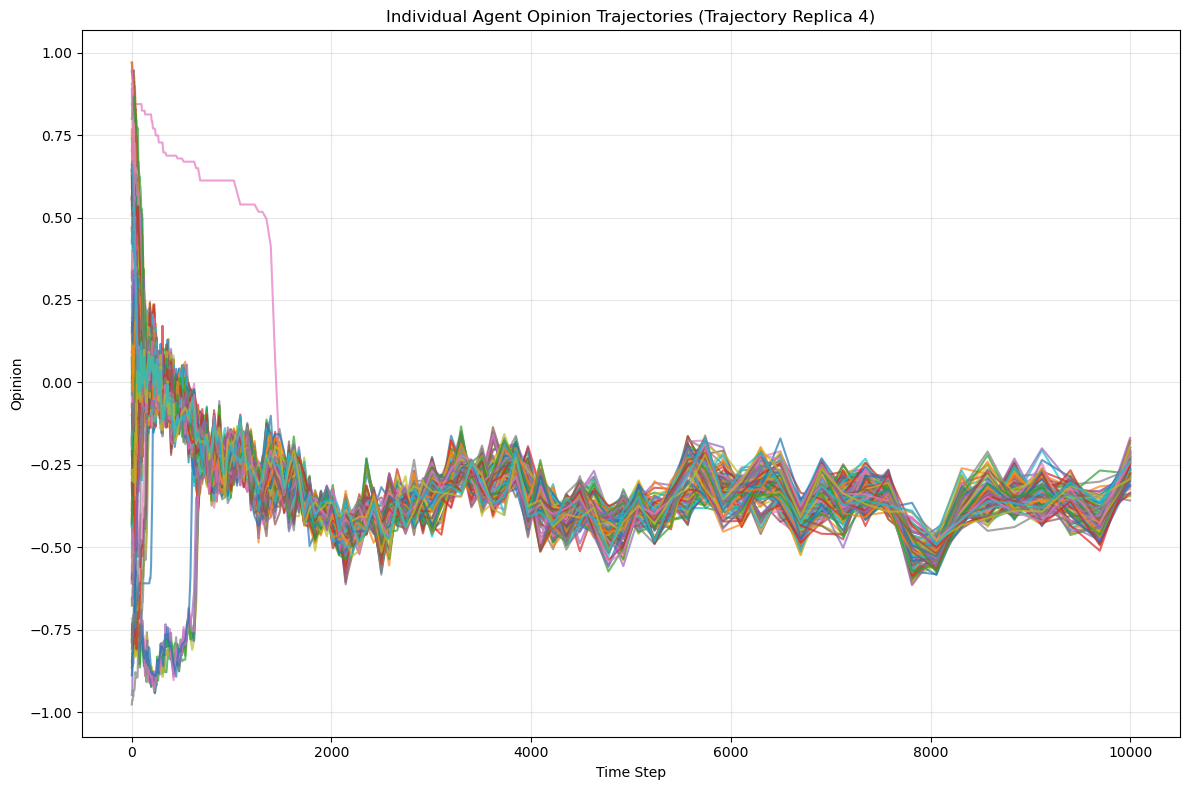

In [25]:
plot_agent_opinions(RES0, replica_idx=0, n_agents_to_plot=100)
plot_agent_opinions(RES0, replica_idx=1, n_agents_to_plot=100)
plot_agent_opinions(RES0, replica_idx=2, n_agents_to_plot=100)
plot_agent_opinions(RES0, replica_idx=3, n_agents_to_plot=100)
plot_agent_opinions(RES0, replica_idx=4, n_agents_to_plot=100)


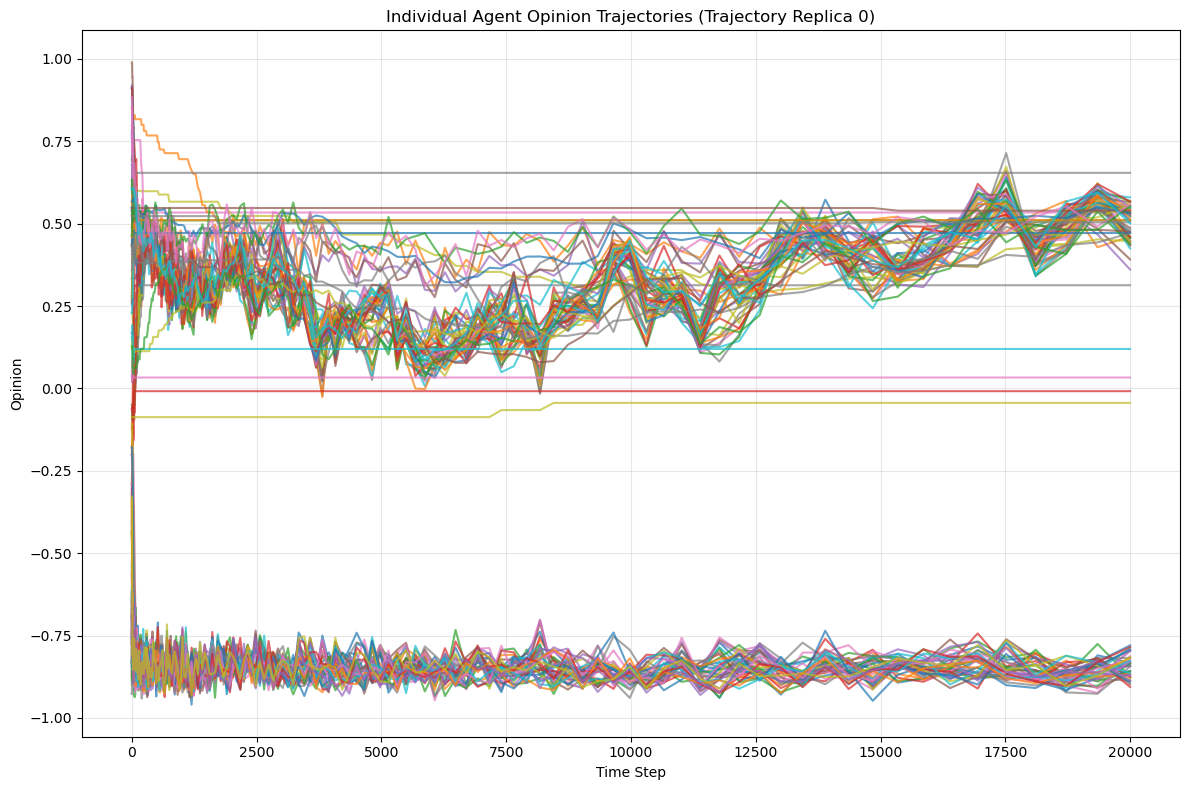

In [18]:
plot_agent_opinions(RES, replica_idx=0, n_agents_to_plot=100)

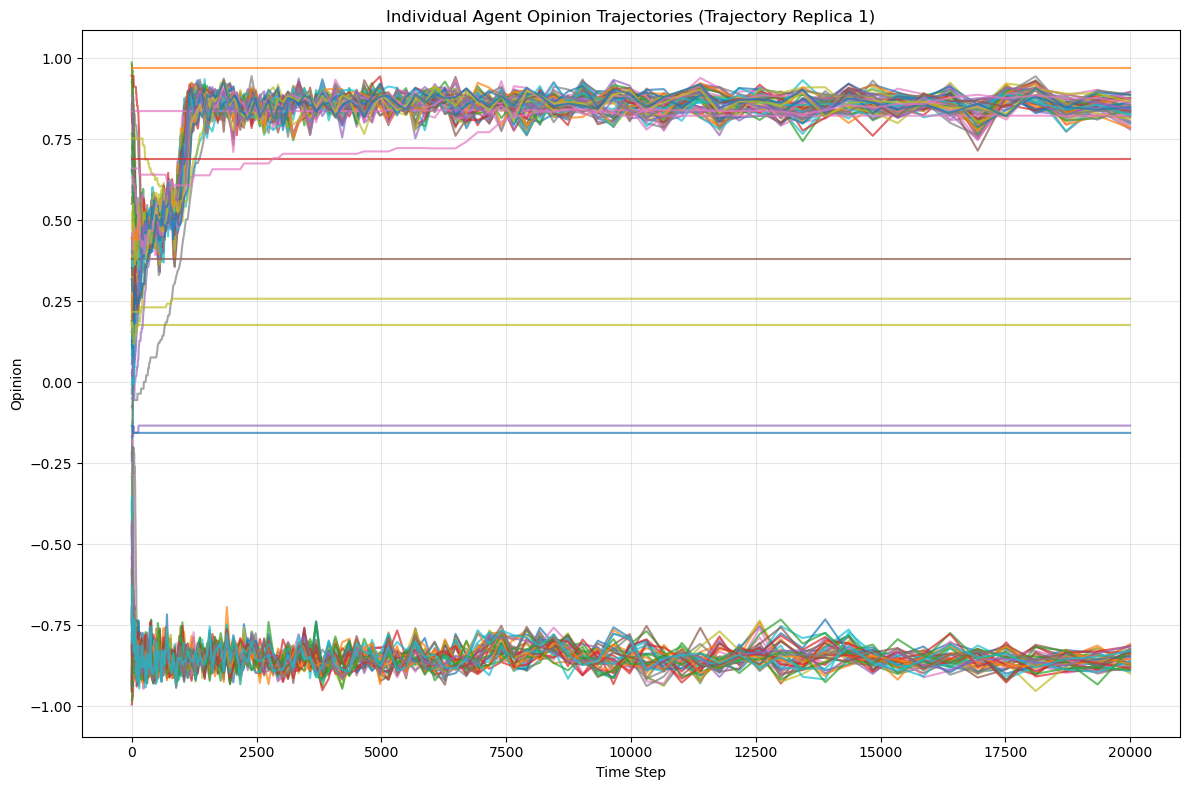

In [19]:
plot_agent_opinions(RES, replica_idx=1, n_agents_to_plot=100)

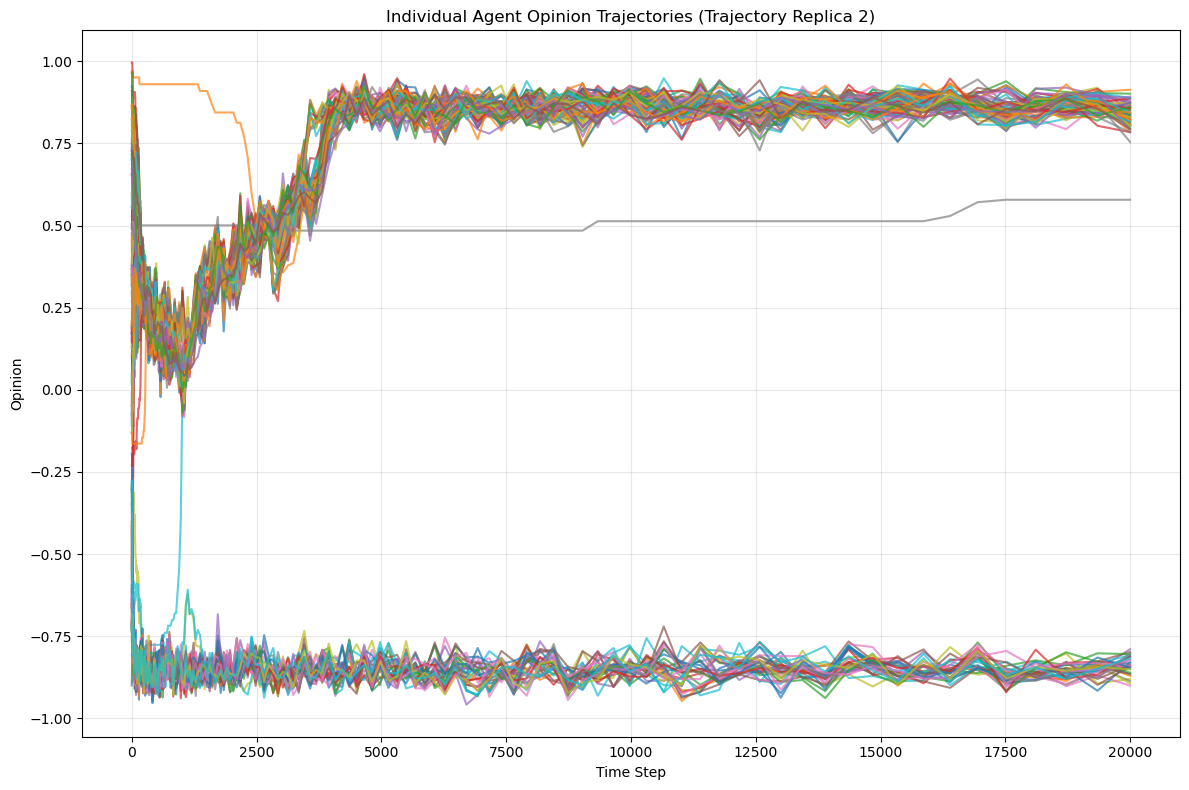

In [20]:
plot_agent_opinions(RES, replica_idx=2, n_agents_to_plot=100)

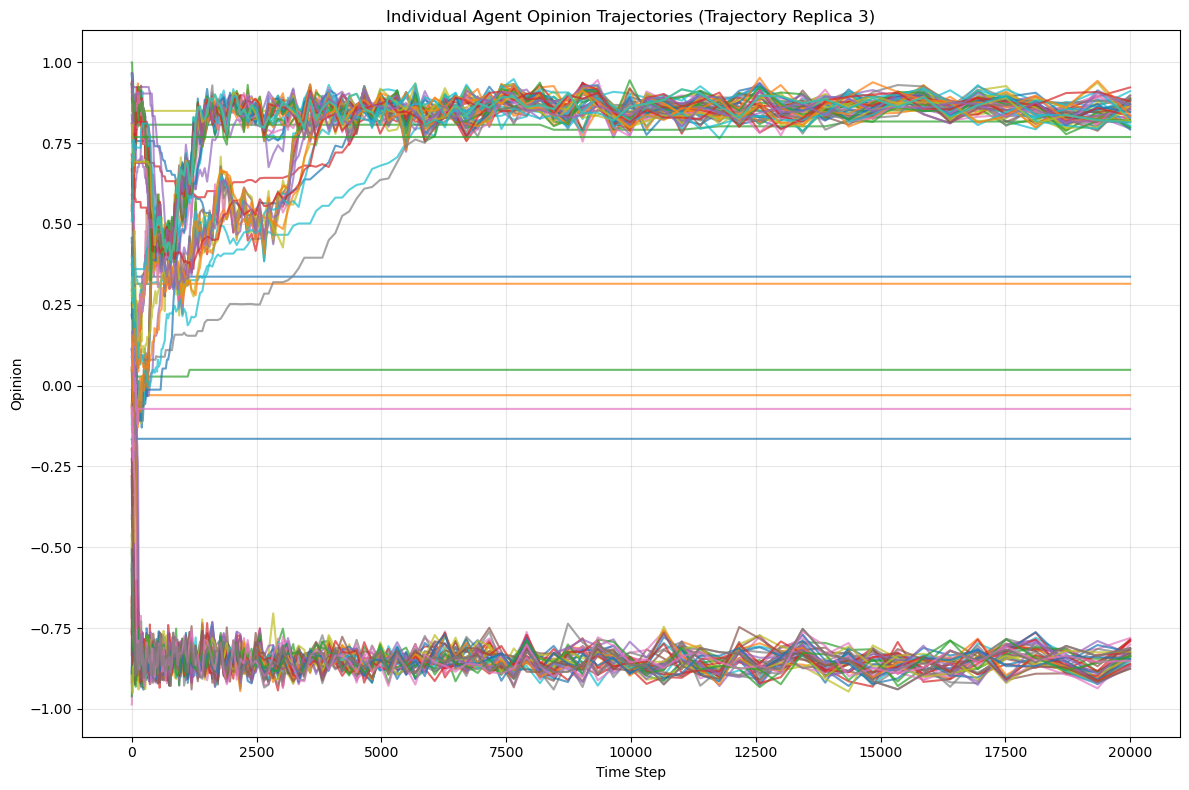

In [21]:
plot_agent_opinions(RES, replica_idx=3, n_agents_to_plot=100)

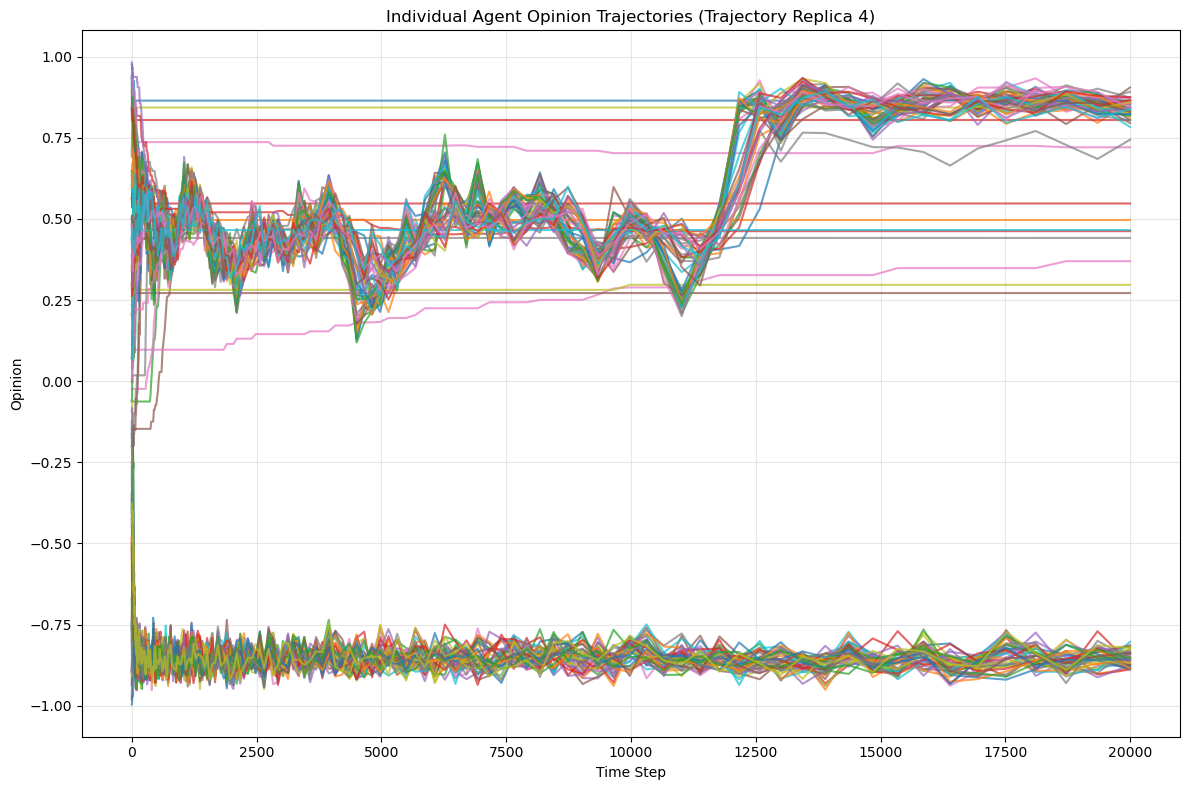

In [22]:
plot_agent_opinions(RES, replica_idx=4, n_agents_to_plot=100)

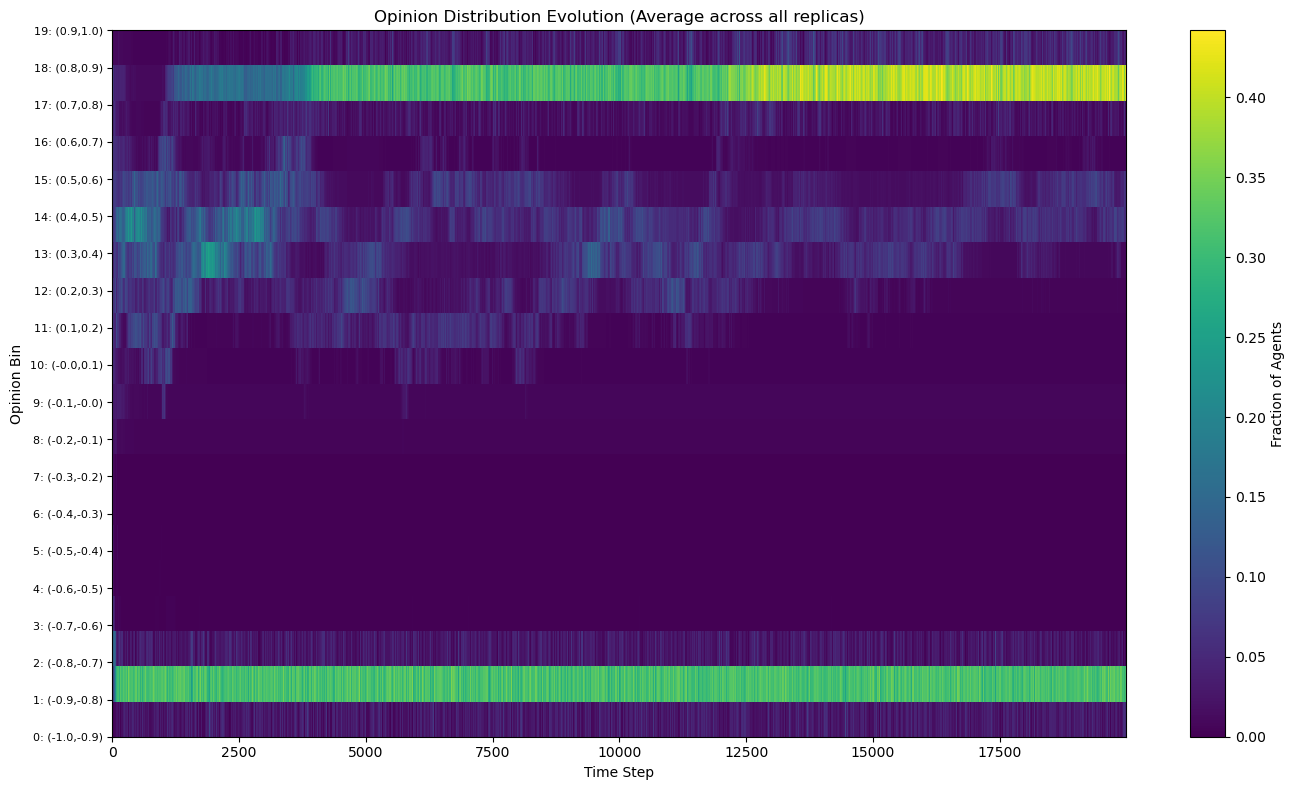

In [23]:
plot_opinion_distribution_evolution(RES)  # Specific replica

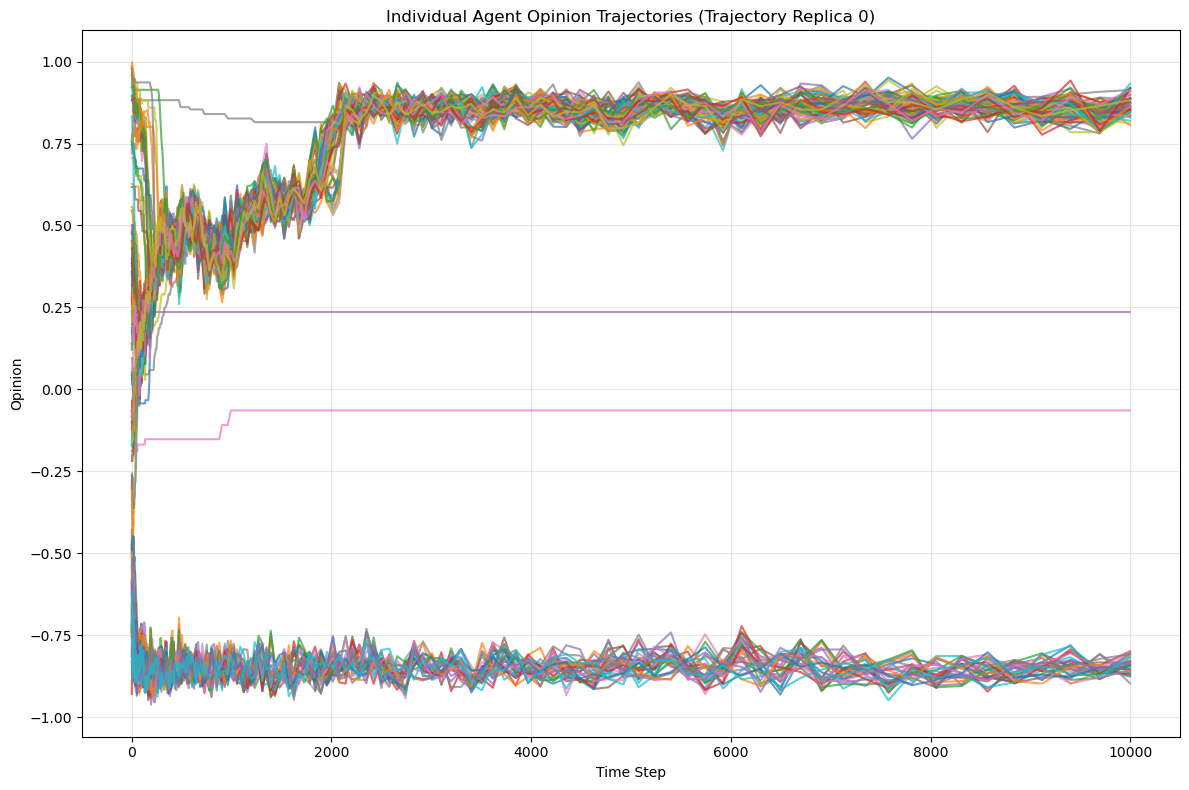

In [16]:
plot_agent_opinions(RES, replica_idx=0, n_agents_to_plot=100)

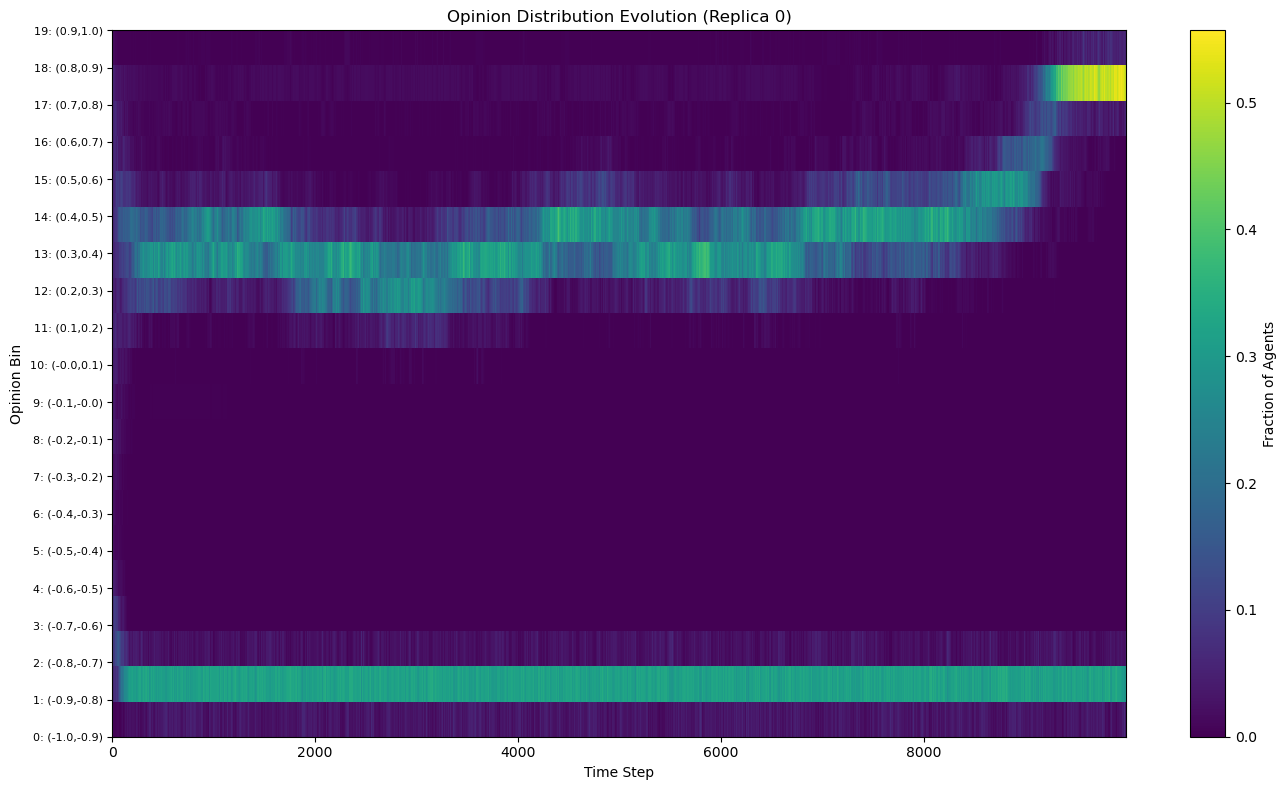

In [12]:
plot_opinion_distribution_evolution(RES, replica_idx=0)  # Specific replica

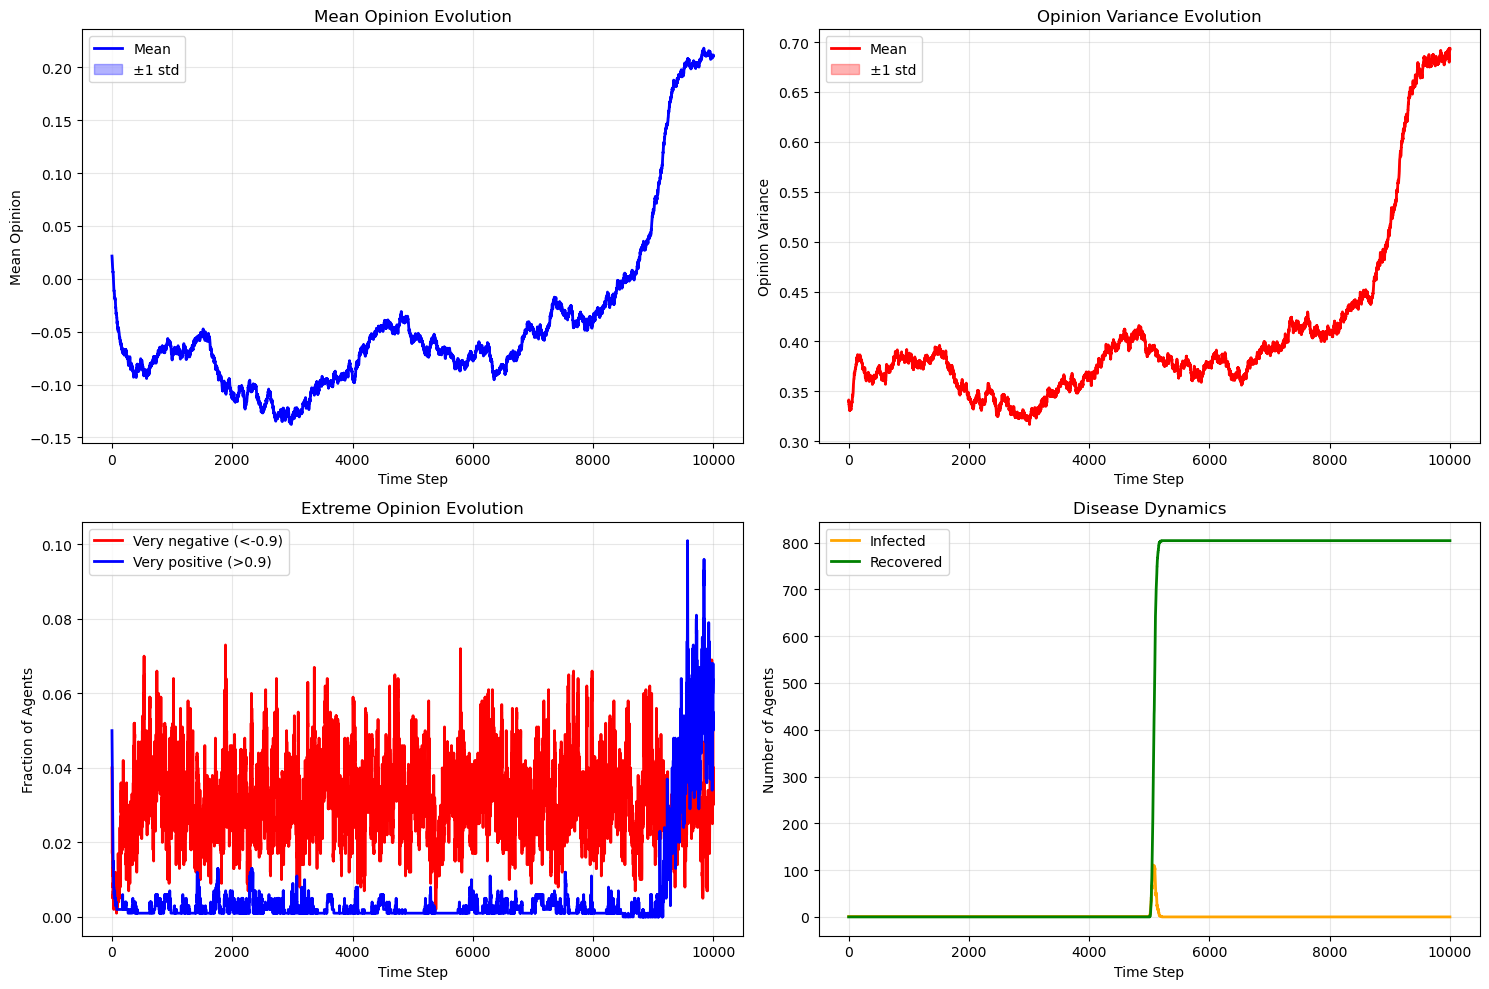

In [14]:
plot_aggregate_statistics(RES)

In [9]:
print(type(RES))
print(RES.keys() if hasattr(RES, 'keys') else 'Not a dict')

<class 'dict'>
dict_keys(['parameters', 'n_replicas', 'trajectory_replica_indices', 'S_count', 'I_count', 'R_count', 'mean_opinion', 'opinion_var', 'fraction_ever_infected', 'opinion_bins', 'opinions', 'save_steps', 'bin_edges', 'bin_labels'])


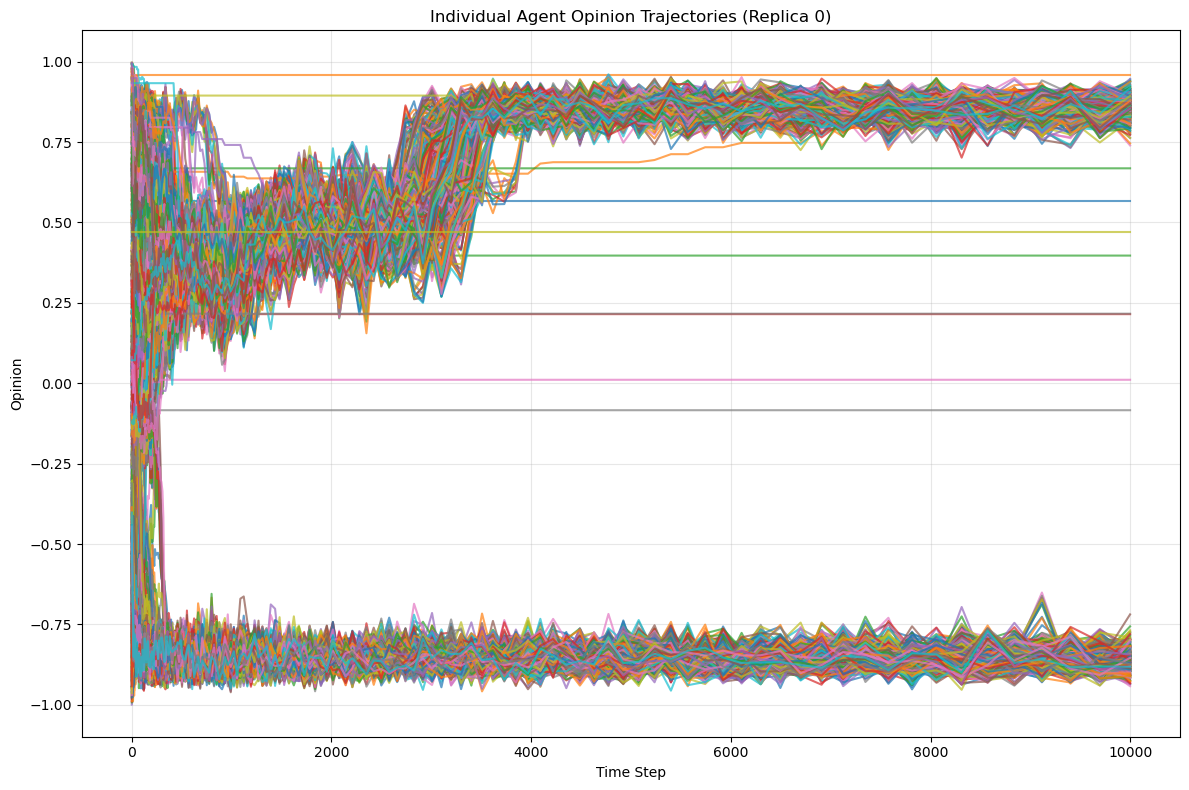

AttributeError: 'str' object has no attribute 'clabel'

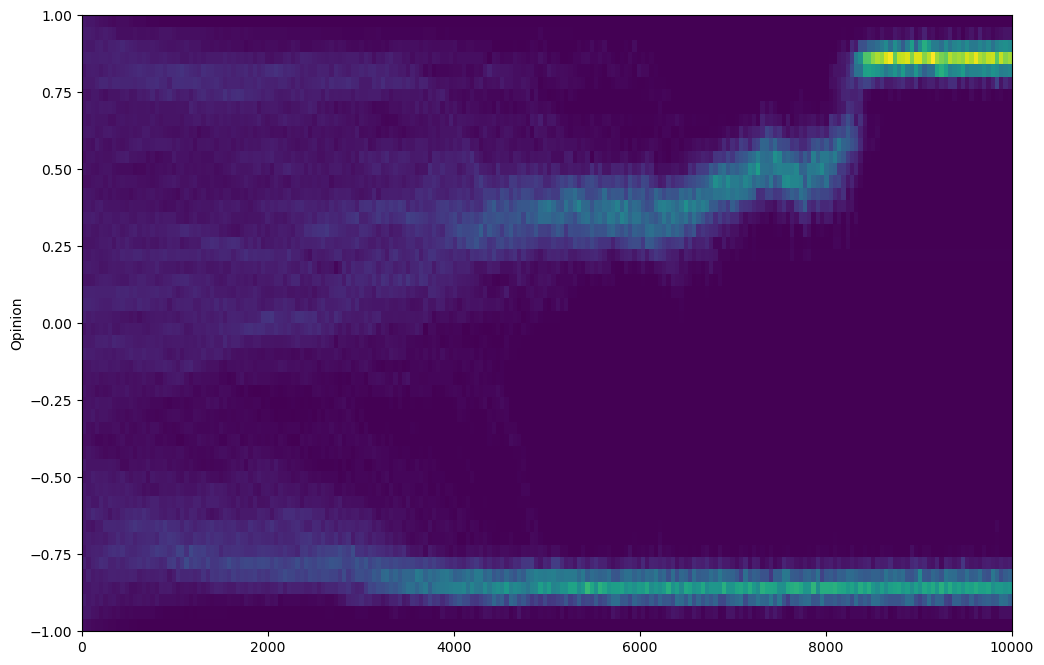

In [53]:
plot_agent_opinions(RES)
plot_binned_opinion_heatmap(RES)

In [ ]:
save_steps = RES[0]['save_steps']  # Time points when opinions were saved
opinions = RES[0]['opinions']      # Shape: (n_time_points, n_humans)


plt.figure(figsize=(12, 8))

# Plot trajectories for first n_agents_to_plot agents
for agent_id in range(min(n_agents_to_plot, opinions.shape[1])):
    agent_opinions = opinions[:, agent_id]  # Opinion trajectory for this agent
    plt.plot(save_steps, agent_opinions, alpha=0.7, linewidth=1.5, 
            label=f'Agent {agent_id}' if n_agents_to_plot <= 10 else None)








In [10]:
save_results(RES, parameters, "only1.pkl")

Results from 1 replicas saved to results\only1.pkl


In [11]:
from pickle_profile import *

In [16]:
filepath = "results/only1.pkl"
profile_pickle_memory(filepath)
with open(filepath, 'rb') as f:
            data = pickle.load(f)
suggest_optimizations(data['all_results'][0])








Total file size: 1.01 MB

MEMORY BREAKDOWN:
all_results         :     1.01 MB
parameters          :     0.00 MB
Total in memory     :     1.01 MB

RESULTS BREAKDOWN   
------------------------------
Number of replicas: 1
Size per replica: 1.01 MB
Projected 100 replicas: 100.83 MB

Per-replica component sizes:
  step_to_idx         :      3.7 KB  dict
  save_steps          :      0.9 KB  (218,) int32
  opinions            :    851.6 KB  (218, 1000) float32
  S_count             :     19.5 KB  (10000,) int16
  I_count             :     19.5 KB  (10000,) int16
  R_count             :     19.5 KB  (10000,) int16
  mean_opinion        :     39.1 KB  (10000,) float32
  opinion_var         :     39.1 KB  (10000,) float32
  fraction_ever_infected:     39.1 KB  (10000,) float32

OPTIMIZATION SUGGESTIONS
----------------------------------------

Total potential savings per replica: 0.0 KB
Savings for 100 replicas: 0.0 MB


In [27]:
type(ts)

dict

In [28]:
print(ts)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 41: 39, 42: 40, 43: 41, 45: 42, 46: 43, 47: 44, 49: 45, 51: 46, 52: 47, 54: 48, 56: 49, 57: 50, 59: 51, 61: 52, 63: 53, 65: 54, 67: 55, 69: 56, 71: 57, 74: 58, 76: 59, 78: 60, 81: 61, 83: 62, 86: 63, 89: 64, 92: 65, 94: 66, 97: 67, 101: 68, 104: 69, 107: 70, 110: 71, 114: 72, 117: 73, 121: 74, 125: 75, 129: 76, 133: 77, 137: 78, 142: 79, 146: 80, 151: 81, 155: 82, 160: 83, 165: 84, 170: 85, 176: 86, 181: 87, 187: 88, 193: 89, 199: 90, 205: 91, 212: 92, 218: 93, 225: 94, 232: 95, 240: 96, 247: 97, 255: 98, 263: 99, 271: 100, 280: 101, 288: 102, 297: 103, 307: 104, 316: 105, 326: 106, 337: 107, 347: 108, 358: 109, 369: 110, 381: 111, 393: 112, 405: 113, 418: 114, 431: 115, 444: 116, 458: 117, 473: 11

ValueError: x and y must have same first dimension, but have shapes (1,) and (218, 1000)

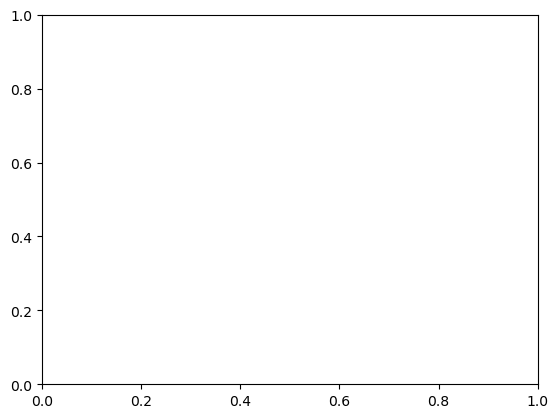

In [22]:
ts = RES[0]["step_to_idx"]
opt = RES[0]["opinions"]


plt.plot(ts, opt)












OPTIMIZATION SUGGESTIONS
----------------------------------------

Total potential savings per replica: 0.0 KB
Savings for 100 replicas: 0.0 MB
